<CENTER><font size="6"><b>Projet 4: Etude de santé publique</b></font></CENTER>

### Import des différentes librairies pour l'analyse des données

In [1]:
import pandas as pd #chargement de la librairie pandas
import numpy as np #chargement de la librairie numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sous_nut = pd.read_csv('sous_nutrition.csv') #chargement du fichier "sous nutrition"
df_sous_nut #affichage des données contenues du fichier

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [3]:
df_pop = pd.read_csv('population.csv') #chargement du fichier "population"
df_pop #affichage des données contenues du fichier

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [4]:
df_dispo = pd.read_csv('dispo_alimentaire.csv') #chargement du fichier "dispo alimentaire"
df_dispo #affichage des données contenues du fichier

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_aide = pd.read_csv('aide_alimentaire.csv') #chargement du fichier "aide alimentaire"
df_aide #affichage des données contenues du fichier

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


<font size="4"><b>Question 1: </b> Proportion de la population en sous nutrition en 2017

In [6]:
# Ici nous allons renommer la colonne 'Valeur' du dataframe sous nutrition
df_sous_nut.rename(columns={
    'Valeur' : 'nb_personnes_sous_nut'
}, inplace=True)

In [7]:
# On renommer la colonne 'Valeur' du dataframe population
df_pop.rename(columns={
    'Valeur' : 'nb_personnes_pop'
}, inplace=True)

In [8]:
# L'anlyse des données a permis de détecter des valeurs de population=0.1, nous allons les remplacer (par 0) 
df_sous_nut['nb_personnes_sous_nut'].replace('<0.1', '0', inplace=True)

In [9]:
# Nous allons convertir la colonne nb_personnes_sous_nut en float pour les besoins de calculs
df_sous_nut['nb_personnes_sous_nut'] = df_sous_nut['nb_personnes_sous_nut'].astype(float)

In [10]:
# Sur les données sous nutrition nous allons convertir les années afin d'avoir la meme échelle d'année que les données Populations
df_sous_nut['Année'] = df_sous_nut['Année'].replace(['2012-2014','2013-2015','2014-2016','2015-2017','2016-2018','2017-2019'],['2013','2014','2015','2016','2017','2018'])

In [11]:
#On applique un filtre sur l'année 2017 pour extraire uniquement les données qui concernent notré étude
sous_nut_2017=df_sous_nut['Année']=='2017'
df_sous_nut_2017=df_sous_nut[sous_nut_2017]
df_sous_nut_2017

,Zone,Année,nb_personnes_sous_nut
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
28,Allemagne,2017,NaN
...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8.0
1198,Viet Nam,2017,6.5
1204,Yémen,2017,NaN
1210,Zambie,2017,NaN


In [12]:
# Conversion de la colonne Année en type int pour pouvoir merge les deux dataframes pour répondre à la question
df_sous_nut['Année'] = df_sous_nut['Année'].astype("int")

In [13]:
#filtrer sur l'année 2017 pour la population
population_2017=df_pop['Année']==2017
df_pop_2017=df_pop[population_2017]
df_pop_2017

,Zone,Année,nb_personnes_pop
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [14]:
#Merge des données population et sous nutrition en 2017 par zone
df_pop_sous_nut = df_pop_2017.merge(df_sous_nut_2017, on=['Zone'], how='inner')

In [15]:
print(df_pop_sous_nut)

                                       Zone  Année_x  nb_personnes_pop  \
0                               Afghanistan     2017         36296.113   
1                            Afrique du Sud     2017         57009.756   
2                                   Albanie     2017          2884.169   
3                                   Algérie     2017         41389.189   
4                                 Allemagne     2017         82658.409   
..                                      ...      ...               ...   
198  Venezuela (République bolivarienne du)     2017         29402.484   
199                                Viet Nam     2017         94600.648   
200                                   Yémen     2017         27834.819   
201                                  Zambie     2017         16853.599   
202                                Zimbabwe     2017         14236.595   

    Année_y  nb_personnes_sous_nut  
0      2017                   10.5  
1      2017                    3.1  


In [16]:
# On Remplace les NaN(valeurs inexistantes) par 0
df_pop_sous_nut.replace(np.nan, 0, inplace=True)

In [17]:
print(df_pop_sous_nut)

                                       Zone  Année_x  nb_personnes_pop  \
0                               Afghanistan     2017         36296.113   
1                            Afrique du Sud     2017         57009.756   
2                                   Albanie     2017          2884.169   
3                                   Algérie     2017         41389.189   
4                                 Allemagne     2017         82658.409   
..                                      ...      ...               ...   
198  Venezuela (République bolivarienne du)     2017         29402.484   
199                                Viet Nam     2017         94600.648   
200                                   Yémen     2017         27834.819   
201                                  Zambie     2017         16853.599   
202                                Zimbabwe     2017         14236.595   

    Année_y  nb_personnes_sous_nut  
0      2017                   10.5  
1      2017                    3.1  


In [18]:
#conversion en bonne unité du nombre de personnes en sous nutrition pour pouvoir être sur la même base de calcul
df_pop_sous_nut['nb_personnes_sous_nut']=df_pop_sous_nut['nb_personnes_sous_nut']*1000
df_pop_sous_nut

,Zone,Année_x,nb_personnes_pop,Année_y,nb_personnes_sous_nut
0,Afghanistan,2017,36296.113,2017,10500.0
1,Afrique du Sud,2017,57009.756,2017,3100.0
2,Albanie,2017,2884.169,2017,100.0
3,Algérie,2017,41389.189,2017,1300.0
4,Allemagne,2017,82658.409,2017,0.0
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,2017,8000.0
199,Viet Nam,2017,94600.648,2017,6500.0
200,Yémen,2017,27834.819,2017,0.0
201,Zambie,2017,16853.599,2017,0.0


In [19]:
#calcul de la proportion des personnes en sous nutrition pour chaque pays en 2017
df_pop_sous_nut['proportion_sous_nut']=df_pop_sous_nut['nb_personnes_sous_nut'] / df_pop_sous_nut['nb_personnes_pop']
df_pop_sous_nut

,Zone,Année_x,nb_personnes_pop,Année_y,nb_personnes_sous_nut,proportion_sous_nut
0,Afghanistan,2017,36296.113,2017,10500.0,0.289287
1,Afrique du Sud,2017,57009.756,2017,3100.0,0.054377
2,Albanie,2017,2884.169,2017,100.0,0.034672
3,Algérie,2017,41389.189,2017,1300.0,0.031409
4,Allemagne,2017,82658.409,2017,0.0,0.000000
...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,2017,8000.0,0.272086
199,Viet Nam,2017,94600.648,2017,6500.0,0.068710
200,Yémen,2017,27834.819,2017,0.0,0.000000
201,Zambie,2017,16853.599,2017,0.0,0.000000


In [20]:
# Calcul du ratio de sous nutrition dans le monde en 2017
ratio_sous_nut = df_pop_sous_nut['nb_personnes_sous_nut'].sum()/df_pop_sous_nut['nb_personnes_pop'].sum()
ratio_sous_nut

0.07101196833235415

In [21]:
# Pourcentage de la population mondiale sous-alimentée en 2017
print('En 2017, ', round(ratio_sous_nut * 100), '% de la population mondiale était sous-alimentée')

En 2017,  7 % de la population mondiale était sous-alimentée


<font size="4">Graphique question 1:

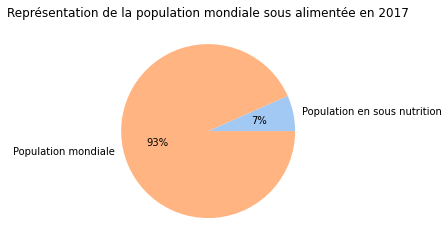

In [22]:
#définir les données
data = [df_pop_sous_nut['nb_personnes_sous_nut'].sum(),df_pop_sous_nut['nb_personnes_pop'].sum()]
labels = ['Population en sous nutrition', 'Population mondiale']

#définir les couleurs
colors = sns.color_palette('pastel')[0:2]

#créer un pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Représentation de la population mondiale sous alimentée en 2017')
plt.show()

<font size="4"><b>Question 2:</b> le nombre théorique de personnes qui pourraient être nourries en 2017

In [23]:
# Affichage par pays
df_dispo.pivot_table(index='Zone', aggfunc='sum')[['Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)']]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)
Zone,,
Afghanistan,2087.0,351.41
Afrique du Sud,3020.0,564.80
Albanie,3188.0,1095.54
Algérie,3293.0,809.13
Allemagne,3503.0,957.52
...,...,...
Émirats arabes unis,3275.0,700.24
Équateur,2346.0,544.91
États-Unis d'Amérique,3682.0,1002.39


In [24]:
# Jointure entre la dispo alimentaire et la population 2017 précédemment calculée
df_nb_pers_nourries = df_pop_2017.merge(df_dispo, on=['Zone'], how='inner')
df_nb_pers_nourries.sample(5)

,Zone,Année,nb_personnes_pop,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
8285,Lettonie,2017,1951.097,Huile de Colza&Moutarde,vegetale,NaN,83.0,195.0,8.02,22.03,0.04,99.0,17.0,69.0,16.0,NaN,47.0,NaN,NaN,0.0
12217,République démocratique populaire lao,2017,6953.035,Perciform,animale,NaN,0.0,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
11124,Pakistan,2017,207906.209,Perciform,animale,20.0,0.0,0.0,0.19,0.00,0.07,55.0,73.0,2.0,35.0,NaN,125.0,NaN,NaN,NaN
15311,Zambie,2017,16853.599,Sucre Eq Brut,vegetale,NaN,0.0,95.0,9.81,NaN,NaN,143.0,223.0,8.0,143.0,NaN,423.0,NaN,NaN,-65.0
7014,Iran (République islamique d'),2017,80673.883,Viande de Suides,animale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [25]:
# Dispo alimentaire totale pour l'année 2017 par pays 
df_nb_pers_nourries['Disponibilité Kcal en 2017'] = df_nb_pers_nourries['Disponibilité alimentaire (Kcal/personne/jour)'] * df_nb_pers_nourries['nb_personnes_pop'] * 365
df_nb_pers_nourries

,Zone,Année,nb_personnes_pop,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité Kcal en 2017
0,Afghanistan,2017,36296.113,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,...,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,6.624041e+07
1,Afghanistan,2017,36296.113,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,...,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,1.324808e+07
2,Afghanistan,2017,36296.113,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.324808e+07
3,Afghanistan,2017,36296.113,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Afghanistan,2017,36296.113,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,...,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,5.299232e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236.595,Viande de Suides,animale,NaN,NaN,24.0,2.65,2.25,...,37.0,0.0,6.0,37.0,NaN,32.0,NaN,0.0,0.0,1.247126e+08
15412,Zimbabwe,2017,14236.595,Viande de Volailles,animale,NaN,NaN,17.0,4.97,1.05,...,70.0,0.0,6.0,70.0,NaN,64.0,NaN,NaN,NaN,8.833807e+07
15413,Zimbabwe,2017,14236.595,"Viande, Autre",animale,NaN,1.0,7.0,2.29,0.21,...,34.0,3.0,1.0,32.0,NaN,36.0,NaN,0.0,NaN,3.637450e+07
15414,Zimbabwe,2017,14236.595,Vin,vegetale,NaN,NaN,1.0,0.27,NaN,...,4.0,0.0,2.0,4.0,NaN,2.0,NaN,NaN,0.0,5.196357e+06


In [26]:
#Nombre nécessaire de Kcal pour nourrir la population en 2017
df_nb_pers_nourries['nb_necessaire_Kcal']=2500*df_nb_pers_nourries['nb_personnes_pop'] * 365
df_nb_pers_nourries

,Zone,Année,nb_personnes_pop,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité Kcal en 2017,nb_necessaire_Kcal
0,Afghanistan,2017,36296.113,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,...,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,6.624041e+07,3.312020e+10
1,Afghanistan,2017,36296.113,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,...,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,1.324808e+07,3.312020e+10
2,Afghanistan,2017,36296.113,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.324808e+07,3.312020e+10
3,Afghanistan,2017,36296.113,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,3.312020e+10
4,Afghanistan,2017,36296.113,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,...,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,5.299232e+07,3.312020e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236.595,Viande de Suides,animale,NaN,NaN,24.0,2.65,2.25,...,0.0,6.0,37.0,NaN,32.0,NaN,0.0,0.0,1.247126e+08,1.299089e+10
15412,Zimbabwe,2017,14236.595,Viande de Volailles,animale,NaN,NaN,17.0,4.97,1.05,...,0.0,6.0,70.0,NaN,64.0,NaN,NaN,NaN,8.833807e+07,1.299089e+10
15413,Zimbabwe,2017,14236.595,"Viande, Autre",animale,NaN,1.0,7.0,2.29,0.21,...,3.0,1.0,32.0,NaN,36.0,NaN,0.0,NaN,3.637450e+07,1.299089e+10
15414,Zimbabwe,2017,14236.595,Vin,vegetale,NaN,NaN,1.0,0.27,NaN,...,0.0,2.0,4.0,NaN,2.0,NaN,NaN,0.0,5.196357e+06,1.299089e+10


In [27]:
# Nombre théorique de personnes pouvant être nourries en 2017 par zone (suposant 2500Kcal moyenne nécessaire par jour pour 1 personne)
df_nb_pers_nourries['Nombre théorique'] = (df_nb_pers_nourries['nb_personnes_pop']*df_nb_pers_nourries['Disponibilité Kcal en 2017'])/df_nb_pers_nourries['nb_necessaire_Kcal']
df_nb_pers_nourries

,Zone,Année,nb_personnes_pop,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité Kcal en 2017,nb_necessaire_Kcal,Nombre théorique
0,Afghanistan,2017,36296.113,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,...,NaN,53.0,NaN,53.0,NaN,NaN,NaN,6.624041e+07,3.312020e+10,72.592226
1,Afghanistan,2017,36296.113,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,...,40.0,39.0,2.0,3.0,NaN,NaN,NaN,1.324808e+07,3.312020e+10,14.518445
2,Afghanistan,2017,36296.113,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.324808e+07,3.312020e+10,14.518445
3,Afghanistan,2017,36296.113,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,3.312020e+10,0.000000
4,Afghanistan,2017,36296.113,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,...,82.0,82.0,NaN,NaN,NaN,NaN,NaN,5.299232e+07,3.312020e+10,58.073781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236.595,Viande de Suides,animale,NaN,NaN,24.0,2.65,2.25,...,6.0,37.0,NaN,32.0,NaN,0.0,0.0,1.247126e+08,1.299089e+10,136.671312
15412,Zimbabwe,2017,14236.595,Viande de Volailles,animale,NaN,NaN,17.0,4.97,1.05,...,6.0,70.0,NaN,64.0,NaN,NaN,NaN,8.833807e+07,1.299089e+10,96.808846
15413,Zimbabwe,2017,14236.595,"Viande, Autre",animale,NaN,1.0,7.0,2.29,0.21,...,1.0,32.0,NaN,36.0,NaN,0.0,NaN,3.637450e+07,1.299089e+10,39.862466
15414,Zimbabwe,2017,14236.595,Vin,vegetale,NaN,NaN,1.0,0.27,NaN,...,2.0,4.0,NaN,2.0,NaN,NaN,0.0,5.196357e+06,1.299089e+10,5.694638


In [28]:
#Nombre personnes qui pourraient être nourries en 2017 dans le monde
question2=(df_nb_pers_nourries['Nombre théorique'].sum())*1000

In [29]:
print('Le nombre théorique de personnes qui pourraient être nourries en 2017 est de',(question2/1000000000),'Milliards')

Le nombre théorique de personnes qui pourraient être nourries en 2017 est de 8.367593850932401 Milliards


<font size="4"><b>Question 3:</b> la disponibilité alimentaire des produits végétaux en 2017

In [30]:
# disponibilité végétale en 2017 par pays
df_dispo_vegetaux = df_nb_pers_nourries.loc[df_nb_pers_nourries['Origine']=='vegetale']
df_dispo_vegetaux

,Zone,Année,nb_personnes_pop,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité Kcal en 2017,nb_necessaire_Kcal,Nombre théorique
1,Afghanistan,2017,36296.113,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,...,40.0,39.0,2.0,3.0,NaN,NaN,NaN,1.324808e+07,3.312020e+10,14.518445
2,Afghanistan,2017,36296.113,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.324808e+07,3.312020e+10,14.518445
3,Afghanistan,2017,36296.113,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,3.312020e+10,0.000000
4,Afghanistan,2017,36296.113,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,...,82.0,82.0,NaN,NaN,NaN,NaN,NaN,5.299232e+07,3.312020e+10,58.073781
6,Afghanistan,2017,36296.113,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,3.312020e+10,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Zimbabwe,2017,14236.595,Sésame,vegetale,NaN,NaN,0.0,0.00,0.00,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.000000e+00,1.299089e+10,0.000000
15407,Zimbabwe,2017,14236.595,Thé,vegetale,NaN,NaN,1.0,0.54,NaN,...,1.0,8.0,NaN,19.0,NaN,NaN,NaN,5.196357e+06,1.299089e+10,5.694638
15408,Zimbabwe,2017,14236.595,Tomates,vegetale,NaN,NaN,1.0,1.80,0.01,...,3.0,25.0,1.0,24.0,NaN,NaN,NaN,5.196357e+06,1.299089e+10,5.694638
15414,Zimbabwe,2017,14236.595,Vin,vegetale,NaN,NaN,1.0,0.27,NaN,...,2.0,4.0,NaN,2.0,NaN,NaN,0.0,5.196357e+06,1.299089e+10,5.694638


In [31]:
##Population mondiale pouvant être nourries par le végétal
df_nb_pers_nourries_vg = df_dispo_vegetaux['Nombre théorique'].sum()
df_nb_pers_nourries_vg

6904305.6846004

In [32]:
print('Le nombre théorique de personnes qui pourraient être nourries par le végétal en 2017 est de', (df_nb_pers_nourries_vg/1000000),'Millions')

Le nombre théorique de personnes qui pourraient être nourries par le végétal en 2017 est de 6.904305684600399 Millions


<font size="4"><b>Question 4:</b> disponibilité intérieure en 2017

In [33]:
# Remplacer les NaN par 0
df_nb_pers_nourries.replace(np.nan, 0, inplace=True)

In [34]:
#Disponibilité Alimentaire = Production + Importations -Exportations + Variation des Stocks
#Disponibilité pour l’alimentation humaine = Total Disponibilité Alimentaire - Alimentation animale - Semences –Transformation Alimentaire - Autres Usages – Pertes
df_nb_pers_nourries

,Zone,Année,nb_personnes_pop,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité Kcal en 2017,nb_necessaire_Kcal,Nombre théorique
0,Afghanistan,2017,36296.113,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,0.0,53.0,0.0,53.0,0.0,0.0,0.0,6.624041e+07,3.312020e+10,72.592226
1,Afghanistan,2017,36296.113,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,40.0,39.0,2.0,3.0,0.0,0.0,0.0,1.324808e+07,3.312020e+10,14.518445
2,Afghanistan,2017,36296.113,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.324808e+07,3.312020e+10,14.518445
3,Afghanistan,2017,36296.113,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,3.312020e+10,0.000000
4,Afghanistan,2017,36296.113,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82.0,82.0,0.0,0.0,0.0,0.0,0.0,5.299232e+07,3.312020e+10,58.073781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236.595,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,...,6.0,37.0,0.0,32.0,0.0,0.0,0.0,1.247126e+08,1.299089e+10,136.671312
15412,Zimbabwe,2017,14236.595,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,...,6.0,70.0,0.0,64.0,0.0,0.0,0.0,8.833807e+07,1.299089e+10,96.808846
15413,Zimbabwe,2017,14236.595,"Viande, Autre",animale,0.0,1.0,7.0,2.29,0.21,...,1.0,32.0,0.0,36.0,0.0,0.0,0.0,3.637450e+07,1.299089e+10,39.862466
15414,Zimbabwe,2017,14236.595,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,...,2.0,4.0,0.0,2.0,0.0,0.0,0.0,5.196357e+06,1.299089e+10,5.694638


In [35]:
#calcul somme des aliments pour animaux :
df_alim_animaux=df_nb_pers_nourries['Aliments pour animaux'].sum()
df_alim_animaux

1288002.0

In [36]:
#calcul somme des pertes :
df_pertes=df_nb_pers_nourries['Pertes'].sum()
df_pertes

452283.0

In [37]:
#calcul total disponibilité intérieure:
df_dispo_interieure=df_nb_pers_nourries['Disponibilité intérieure'].sum()
df_dispo_interieure

9733927.0

In [38]:
#calcul somme nourriture humaine :
df_nourriture=df_nb_pers_nourries['Nourriture'].sum()
df_nourriture

4805525.0

In [39]:
    #la part qui est attribuée à l’alimentation animale:
    df_nb_pers_nourries['part_animale']=df_alim_animaux/df_dispo_interieure
    #la part qui est attribuée au pertes :
    df_nb_pers_nourries['part_pertes']=df_pertes/df_dispo_interieure
    #la part qui est attribuée à l'alimentation humaine:
    df_nb_pers_nourries['part_alimentation']=df_nourriture/df_dispo_interieure
    #la part du reste de la disponibilité intérieur:
    df_reste=df_dispo_interieure-(df_alim_animaux+df_pertes+df_nourriture)
    df_nb_pers_nourries['part_reste']=df_reste/df_dispo_interieure
    df_nb_pers_nourries

,Zone,Année,nb_personnes_pop,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Semences,Traitement,Variation de stock,Disponibilité Kcal en 2017,nb_necessaire_Kcal,Nombre théorique,part_animale,part_pertes,part_alimentation,part_reste
0,Afghanistan,2017,36296.113,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,0.0,0.0,0.0,6.624041e+07,3.312020e+10,72.592226,0.132321,0.046465,0.493688,0.327526
1,Afghanistan,2017,36296.113,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,0.0,0.0,0.0,1.324808e+07,3.312020e+10,14.518445,0.132321,0.046465,0.493688,0.327526
2,Afghanistan,2017,36296.113,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,0.0,0.0,0.0,1.324808e+07,3.312020e+10,14.518445,0.132321,0.046465,0.493688,0.327526
3,Afghanistan,2017,36296.113,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.000000e+00,3.312020e+10,0.000000,0.132321,0.046465,0.493688,0.327526
4,Afghanistan,2017,36296.113,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,0.0,0.0,0.0,5.299232e+07,3.312020e+10,58.073781,0.132321,0.046465,0.493688,0.327526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236.595,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,...,0.0,0.0,0.0,1.247126e+08,1.299089e+10,136.671312,0.132321,0.046465,0.493688,0.327526
15412,Zimbabwe,2017,14236.595,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,...,0.0,0.0,0.0,8.833807e+07,1.299089e+10,96.808846,0.132321,0.046465,0.493688,0.327526
15413,Zimbabwe,2017,14236.595,"Viande, Autre",animale,0.0,1.0,7.0,2.29,0.21,...,0.0,0.0,0.0,3.637450e+07,1.299089e+10,39.862466,0.132321,0.046465,0.493688,0.327526
15414,Zimbabwe,2017,14236.595,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,...,0.0,0.0,0.0,5.196357e+06,1.299089e+10,5.694638,0.132321,0.046465,0.493688,0.327526


<font size="4">Graphique question 4:

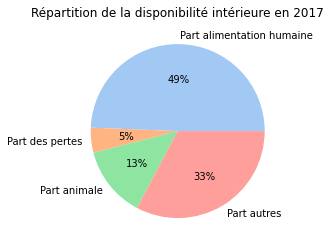

In [40]:
#définir les données
data = [df_nourriture, df_pertes, df_alim_animaux, df_reste]
labels = ['Part alimentation humaine','Part des pertes', 'Part animale', 'Part autres']

#définir les couleurs
colors = sns.color_palette('pastel')[0:4]

#créer un pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Répartition de la disponibilité intérieure en 2017')
plt.show()

<font size="4"><b>Question 5:</b> les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [41]:
df_pop_sous_nut['ratio_sous_alim']=df_pop_sous_nut['nb_personnes_sous_nut']/df_pop_sous_nut['nb_personnes_pop']
df_pop_sous_nut

,Zone,Année_x,nb_personnes_pop,Année_y,nb_personnes_sous_nut,proportion_sous_nut,ratio_sous_alim
0,Afghanistan,2017,36296.113,2017,10500.0,0.289287,0.289287
1,Afrique du Sud,2017,57009.756,2017,3100.0,0.054377,0.054377
2,Albanie,2017,2884.169,2017,100.0,0.034672,0.034672
3,Algérie,2017,41389.189,2017,1300.0,0.031409,0.031409
4,Allemagne,2017,82658.409,2017,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,2017,8000.0,0.272086,0.272086
199,Viet Nam,2017,94600.648,2017,6500.0,0.068710,0.068710
200,Yémen,2017,27834.819,2017,0.0,0.000000,0.000000
201,Zambie,2017,16853.599,2017,0.0,0.000000,0.000000


<font size="4">Top 10:

In [42]:
top10=df_pop_sous_nut['ratio_sous_alim'].groupby(by=df_pop_sous_nut['Zone']).sum().sort_values(ascending=False).head(10).reset_index()
#modification du nom de la république démocratique de Corée pour la présentation du graphique
top10.replace('République populaire démocratique de Corée', 'Corée du Sud', inplace=True)
top10

,Zone,ratio_sous_alim
0,Haïti,0.482592
1,Corée du Sud,0.471887
2,Madagascar,0.410629
3,Libéria,0.382797
4,Lesotho,0.382494
5,Tchad,0.379576
6,Rwanda,0.350556
7,Mozambique,0.328109
8,Timor-Leste,0.321735
9,Afghanistan,0.289287


<font size="4">Graphique question 5:

[Text(0.5, 1.0, 'Top 10 des pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017')]

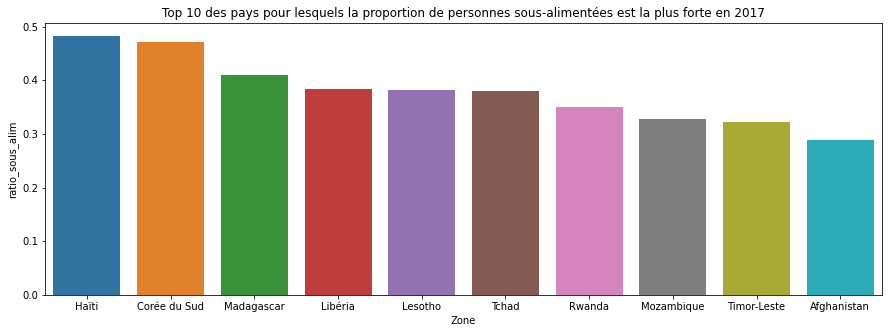

In [43]:
#histogramme représentant le top10
fig, taille_fig = plt.subplots(figsize=(15, 5))
sns.barplot(ax=taille_fig,y=top10['ratio_sous_alim'], x=top10['Zone']).set(title='Top 10 des pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017')


<font size="4"><b>Question 6:</b> ceux qui ont le plus bénéficié d’aide depuis 2013:

In [44]:
#filtrer à partir de l'année 2013 
aide_2013=df_aide['Année']>=2013
df_aide_2013=df_aide[aide_2013]
df_aide_2013

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [45]:
top_pays_beneficiaire=df_aide_2013['Valeur'].groupby(by=df_aide_2013['Pays bénéficiaire']).sum().sort_values(ascending=False).head(10).reset_index()
top_pays_beneficiaire

,Pays bénéficiaire,Valeur
0,République arabe syrienne,1858943
1,Éthiopie,1381294
2,Yémen,1206484
3,Soudan du Sud,695248
4,Soudan,669784
5,Kenya,552836
6,Bangladesh,348188
7,Somalie,292678
8,République démocratique du Congo,288502
9,Niger,276344


<font size="4">Graphique question 6:

[Text(0.5, 1.0, "Top 10 des pays ayant le plus bénéficiés d'aide depuis 2013")]

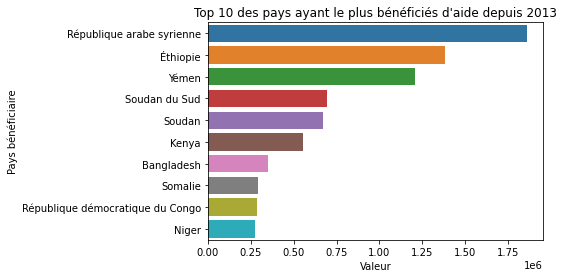

In [46]:
sns.barplot(x=top_pays_beneficiaire['Valeur'], y = top_pays_beneficiaire['Pays bénéficiaire']).set(title='''Top 10 des pays ayant le plus bénéficiés d'aide depuis 2013''')

<font size="4"><b>Question 7:</b> Pays ayant le plus de disponibilité/habitant en 2017

In [47]:
top_plus_dispohab=df_nb_pers_nourries['Disponibilité alimentaire (Kcal/personne/jour)'].groupby(by=df_nb_pers_nourries['Zone']).sum().sort_values(ascending=False).head(10).reset_index()
top_plus_dispohab

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Autriche,3770.0
1,Belgique,3737.0
2,Turquie,3708.0
3,États-Unis d'Amérique,3682.0
4,Israël,3610.0
5,Irlande,3602.0
6,Italie,3578.0
7,Luxembourg,3540.0
8,Égypte,3518.0
9,Allemagne,3503.0


<font size="4"><b>Question 8:</b> Pays ayant le moins de disponibilité/habitant en 2017

In [48]:
top_moins_dispohab=df_nb_pers_nourries['Disponibilité alimentaire (Kcal/personne/jour)'].groupby(by=df_nb_pers_nourries['Zone']).sum().sort_values(ascending=True).head(10).reset_index()
top_moins_dispohab

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0
5,République populaire démocratique de Corée,2093.0
6,Tchad,2109.0
7,Zimbabwe,2113.0
8,Ouganda,2126.0
9,Timor-Leste,2129.0


<font size="4"><b>Question 9:</b> Utilisation des céréales dans le monde:

In [49]:
# Création d'une liste contenant toutes les céréales
liste_céréales=['Avoine','Blé','Céréales, Autres', 'Maïs', 'Millet', 'Orge','Riz (Eq Blanchi)','Seigle','Sorgho']
liste_céréales

['Avoine',
 'Blé',
 'Céréales, Autres',
 'Maïs',
 'Millet',
 'Orge',
 'Riz (Eq Blanchi)',
 'Seigle',
 'Sorgho']

In [50]:
#dataframe de la dispo filtré sur la liste des céréales 
df_cereales=df_dispo[df_dispo.Produit.isin(liste_céréales)]
df_cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,200.0,NaN,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13.0,NaN,NaN,12.0,1.0,13.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360.0,NaN,26.0,2.92,0.24,0.79,524.0,NaN,10.0,89.0,52.0,514.0,22.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
15568,Îles Salomon,Maïs,vegetale,NaN,NaN,1.0,0.15,0.01,0.03,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15575,Îles Salomon,Orge,vegetale,NaN,NaN,0.0,0.07,NaN,0.01,1.0,NaN,1.0,0.0,NaN,NaN,NaN,1.0,NaN
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,NaN,0.0


In [51]:
#groupement par type de céréales:
df_cereales.groupby(by="Produit")[('Autres Utilisations','Nourriture', 'Pertes', 'Aliments pour animaux','Disponibilité intérieure')].sum()

C:\Users\CAMILL~1.AMI\AppData\Local\Temp/ipykernel_18008/4163941201.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cereales.groupby(by="Produit")[('Autres Utilisations','Nourriture', 'Pertes', 'Aliments pour animaux','Disponibilité intérieure')].sum()


,Autres Utilisations,Nourriture,Pertes,Aliments pour animaux,Disponibilité intérieure
Produit,,,,,
Avoine,206.0,3903.0,514.0,16251.0,23407.0
Blé,22424.0,457824.0,27530.0,129668.0,679498.0
"Céréales, Autres",1388.0,5324.0,785.0,19035.0,27485.0
Maïs,189386.0,125184.0,40701.0,546116.0,955799.0
Millet,196.0,23040.0,2276.0,3306.0,29911.0
Orge,654.0,6794.0,4628.0,92658.0,140439.0
Riz (Eq Blanchi),18464.0,377286.0,27378.0,33594.0,475656.0
Seigle,20.0,5502.0,562.0,8099.0,16567.0
Sorgho,2049.0,24153.0,2746.0,24808.0,58237.0


In [52]:
#Calcul du taux de la nourriture animale
taux_nourriture_animale = (df_cereales['Aliments pour animaux'].sum() / (df_cereales['Aliments pour animaux'].sum() + df_cereales['Nourriture'].sum()))*100
print('Le taux de nourriture animale sur la part totale de céréales à destination animale et humaine est de', round(taux_nourriture_animale,2), '%')

Le taux de nourriture animale sur la part totale de céréales à destination animale et humaine est de 45.91 %


<font size="4"><b>Question 10:</b> Quelle utilisation du Manioc en Thaïlande ?

In [53]:
#Quelle utilisation du Manioc en Thaïlande ?
df_thailande = df_nb_pers_nourries.loc[(df_nb_pers_nourries['Zone'] == 'Thaïlande') & (df_nb_pers_nourries['Produit'] == 'Manioc')]
df_thailande_export = df_thailande['Exportations - Quantité'].sum(skipna=True)
df_thailande_export

25214.0

In [54]:
print('La quantité de manioc exportée par la Thaïlande est de ' + str(df_thailande_export) + ' milliers de tonnes.')

La quantité de manioc exportée par la Thaïlande est de 25214.0 milliers de tonnes.


In [55]:
#Quelle est la proportion du Manioc exporté ?
df_thailande_ratio=(df_thailande['Exportations - Quantité'] / (df_thailande['Disponibilité intérieure'] + df_thailande['Exportations - Quantité'])) * 100
df_thailande_ratio

14166    80.100388
dtype: float64